In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-for-financial-news/all-data.csv
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/Sentences_66Agree.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/Sentences_AllAgree.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/README.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/License.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/Sentences_75Agree.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/Sentences_50Agree.txt
/kaggle/input/bitcoin-tweets/Bitcoin_tweets_dataset_2.csv
/kaggle/input/bitcoin-tweets/Bitcoin_tweets.csv
/kaggle/input/aspect-based-sentiment-analysis-for-financial-news/SEntFiN-v1.1.csv
/kaggle/input/fintechdata/data.csv


dataset link: <br>
https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news  <br>
https://www.kaggle.com/datasets/ankurzing/aspect-based-sentiment-analysis-for-financial-news

In [2]:
!pip install nltk

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
import re
import seaborn as sn
from sklearn.preprocessing import LabelEncoder 
import warnings
from sklearn.metrics import classification_report, confusion_matrix
# basic preprocessing 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# ignore all warnings
warnings.filterwarnings('ignore')

**LOADIN DATASET 1 AND BASIC PREPARTION**

In [4]:
# import sample data
data1 =  pd.read_csv('/kaggle/input/aspect-based-sentiment-analysis-for-financial-news/SEntFiN-v1.1.csv')
# import sample data
data2 =  pd.read_csv('/kaggle/input/sentiment-analysis-for-financial-news/all-data.csv', encoding='ISO-8859-1', header=None, names=['sentiment', 'title'])
data1

,S No.,Title,Decisions,Words
0,1,SpiceJet to issue 6.4 crore warrants to promoters,"{""SpiceJet"": ""neutral""}",8
1,2,MMTC Q2 net loss at Rs 10.4 crore,"{""MMTC"": ""neutral""}",8
2,3,"Mid-cap funds can deliver more, stay put: Experts","{""Mid-cap funds"": ""positive""}",8
3,4,Mid caps now turn into market darlings,"{""Mid caps"": ""positive""}",7
4,5,"Market seeing patience, if not conviction: Pra...","{""Market"": ""neutral""}",8
...,...,...,...,...
10748,10749,"Negative on Chambal, Advanta: Mitesh Thacker","{""Chambal"": ""negative"", ""Advanta"": ""negative""}",6
10749,10750,"Small, Mid-cap stocks may emerge outperformers","{""Small"": ""positive"", ""Mid-cap stocks"": ""posit...",6
10750,10751,Rupee slips against US dollar,"{""Rupee"": ""negative"", ""US dollar"": ""neutral""}",5
10751,10752,Rupee weak against US dollar,"{""Rupee"": ""negative"", ""US dollar"": ""neutral""}",5


In [5]:
data2

,sentiment,title
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [6]:
data1.Decisions.unique()

array(['{"SpiceJet": "neutral"}', '{"MMTC": "neutral"}',
       '{"Mid-cap funds": "positive"}', ...,
       '{"Chambal": "negative", "Advanta": "negative"}',
       '{"Small": "positive", "Mid-cap stocks": "positive"}',
       '{"Australia shares": "neutral", "energy": "neutral"}'],
      dtype=object)

In [7]:
def extract_text(input_string):
    # Define a regular expression pattern to match only alphabetic characters
    pattern = re.compile('[a-zA-Z]+')
    
    # Use findall to extract all matches of the pattern from the input string
    text_only = pattern.findall(input_string)
    
    # Join the extracted text into a single string
    result = ' '.join(text_only)
    
    return result

In [8]:
# basic process
data1['sentiment'] = [extract_text(data.split(':')[-1]) for data in data1.Decisions]
data1.head()

,S No.,Title,Decisions,Words,sentiment
0,1,SpiceJet to issue 6.4 crore warrants to promoters,"{""SpiceJet"": ""neutral""}",8,neutral
1,2,MMTC Q2 net loss at Rs 10.4 crore,"{""MMTC"": ""neutral""}",8,neutral
2,3,"Mid-cap funds can deliver more, stay put: Experts","{""Mid-cap funds"": ""positive""}",8,positive
3,4,Mid caps now turn into market darlings,"{""Mid caps"": ""positive""}",7,positive
4,5,"Market seeing patience, if not conviction: Pra...","{""Market"": ""neutral""}",8,neutral


In [9]:
data1  = data1[['Title', 'sentiment']]
data1

,Title,sentiment
0,SpiceJet to issue 6.4 crore warrants to promoters,neutral
1,MMTC Q2 net loss at Rs 10.4 crore,neutral
2,"Mid-cap funds can deliver more, stay put: Experts",positive
3,Mid caps now turn into market darlings,positive
4,"Market seeing patience, if not conviction: Pra...",neutral
...,...,...
10748,"Negative on Chambal, Advanta: Mitesh Thacker",negative
10749,"Small, Mid-cap stocks may emerge outperformers",positive
10750,Rupee slips against US dollar,neutral
10751,Rupee weak against US dollar,neutral


****DATASET BASIC EXPLORATION****

In [10]:
print('Dataset 1')
row , col = data1.shape
print('Row count: ', row, ' Col Couont: ', col)

Dataset 1
Row count:  10753  Col Couont:  2


In [11]:
print('Dataset 2')
row , col = data2.shape
print('Row count: ', row, ' Col Couont: ', col)

Dataset 2
Row count:  4846  Col Couont:  2


In [12]:
data1['title'] = data1.Title
data1 = data1.drop(columns=['Title'])
data1.head()

,sentiment,title
0,neutral,SpiceJet to issue 6.4 crore warrants to promoters
1,neutral,MMTC Q2 net loss at Rs 10.4 crore
2,positive,"Mid-cap funds can deliver more, stay put: Experts"
3,positive,Mid caps now turn into market darlings
4,neutral,"Market seeing patience, if not conviction: Pra..."


In [13]:
# merging both dataset 
sent_data = pd.concat([data1, data2], axis=0, ignore_index=True)
sent_data.head()

,sentiment,title
0,neutral,SpiceJet to issue 6.4 crore warrants to promoters
1,neutral,MMTC Q2 net loss at Rs 10.4 crore
2,positive,"Mid-cap funds can deliver more, stay put: Experts"
3,positive,Mid caps now turn into market darlings
4,neutral,"Market seeing patience, if not conviction: Pra..."


In [14]:
print('Sentiment Dataset')
row , col = sent_data.shape
print('Row count: ', row, ' Col Couont: ', col)

Sentiment Dataset
Row count:  15599  Col Couont:  2


In [15]:
sent_data.title[1]

'MMTC Q2 net loss at Rs 10.4 crore'

In [16]:
len(sent_data.title[1].split())

8

In [17]:
def word_count(x):
    return len(x.split())

sent_data['word_count'] = sent_data.title.apply(lambda x:word_count(x))
sent_data.head()

,sentiment,title,word_count
0,neutral,SpiceJet to issue 6.4 crore warrants to promoters,8
1,neutral,MMTC Q2 net loss at Rs 10.4 crore,8
2,positive,"Mid-cap funds can deliver more, stay put: Experts",8
3,positive,Mid caps now turn into market darlings,7
4,neutral,"Market seeing patience, if not conviction: Pra...",8


In [18]:
sent_data.sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

Text(0.5, 1.0, 'Data Distribution Based on Sentiment')

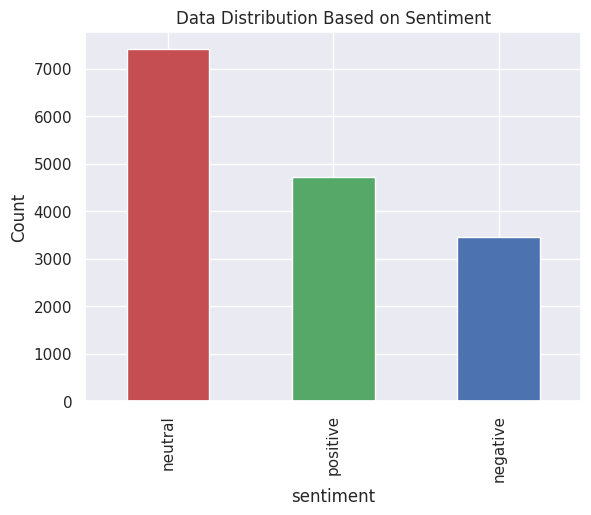

In [19]:
sn.set()
sent_data.sentiment.value_counts().plot(kind='bar', color=['r', 'g', 'b'])
plt.ylabel('Count')
plt.title('Data Distribution Based on Sentiment')

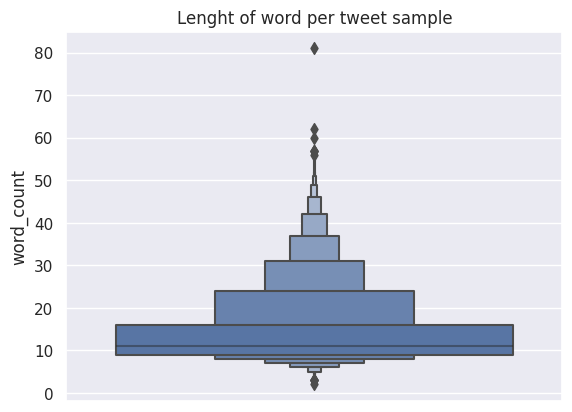

In [20]:
plt.title('Lenght of word per tweet sample')
sn.boxenplot(data=sent_data, y='word_count')
plt.show()

<Axes: title={'center': 'Word Lenght Per Number of Sample'}, xlabel='word_count'>

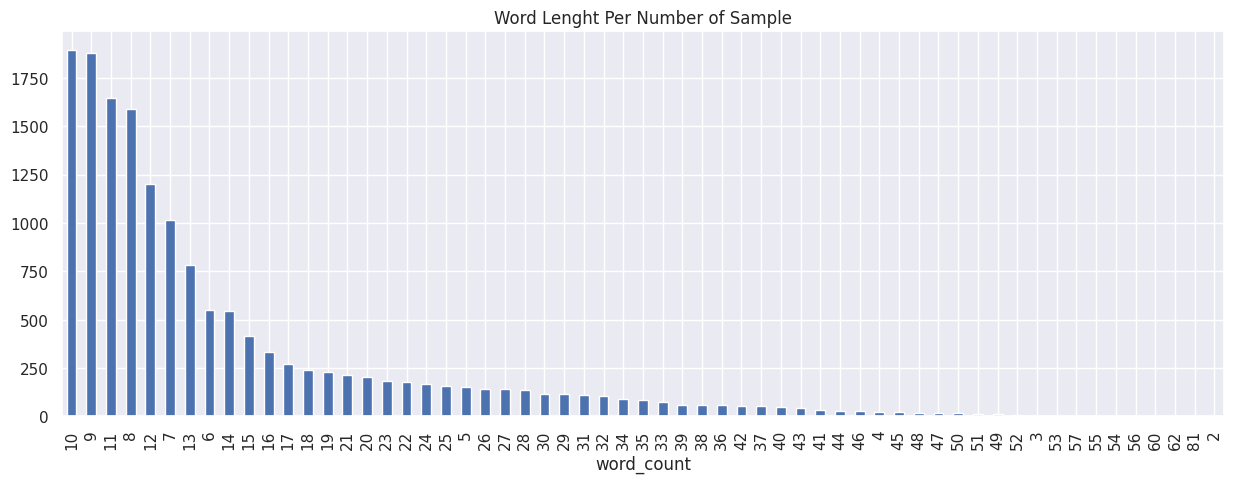

In [21]:
plt.figure(figsize=(15, 5))
plt.title('Word Lenght Per Number of Sample')
sent_data['word_count'].sort_values(ascending=False).value_counts().plot(kind='bar')

In [22]:
for text in sent_data['title'].sample(20): 
    print(text)

BSE to launch IRF trading from January 20
Kuldip Singh named new CMD of MTNL
Sebi allows Pune Stock Exchange to exit bourse business
MOIL Q1 net profit down 8.74 per cent at Rs 99.41 crore
China slaps restrictions on 7 securities and futures institutions
Here are the jobs most in demand on Wall Street
Cameco typically prices sales contracts using a 40:60 ratio of fixed prices and spot prices .
NALCO can offer a good upside: Avinnash Gorakssakar
Leo Puri likely to become CMD of UTI Asset Management Company
Farmers reap a tidy profit as turmeric prices shoot up
Saraswat Bank posts 78% growth in net profit at Rs 212.27-cr
Markets to be in limbo till poll results: Nitin Raheja
Refinery margins reasonable, but inventory losses hurting oil sector: Prashasta Seth
Oil prices at a 13-month low; slips to $102 per barrel
Brokerages pick manufacturing and infrastructure companies ahead of Budget 2015
Global markets: Economic data will continue to be important this week
HCC shares zoom 7% on positi

PREPROCESSING

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
st  = stopwords.words('english')
print(st)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
sample_text = sent_data.title.sample(10)
sample_text

2577     Gold rises nearly 1 per cent after US Federal ...
3816            Pulse prices dip by 4% -5% but tur defiant
7699     Wipro rallies on winning 10-year outsourcing e...
8731                 Maize futures dip on selling pressure
12520    This location makes the mall a convenient plac...
15447    Net sales decreased to EUR 91.6 mn from EUR 10...
3711     Egypt stock market plunges on reports of new t...
6574     Poll: Us Federal Reserve may rates twice in 20...
10095    HDIL Q1 net down 44%; to generate 2 million sq...
6058     Immediate resistance for rupee is placed at 55...
Name: title, dtype: object

In [26]:
def remove_stopwords(sent):
    return ' '.join([x for x in sent.split() if x not in st])

sample_text = sample_text.apply(lambda x:remove_stopwords(x))
sample_text

2577     Gold rises nearly 1 per cent US Federal Reserv...
3816                   Pulse prices dip 4% -5% tur defiant
7699     Wipro rallies winning 10-year outsourcing enga...
8731                    Maize futures dip selling pressure
12520    This location makes mall convenient place shop...
15447    Net sales decreased EUR 91.6 mn EUR 109mn corr...
3711          Egypt stock market plunges reports new taxes
6574     Poll: Us Federal Reserve may rates twice 2015,...
10095    HDIL Q1 net 44%; generate 2 million sq ft TDRs...
6058      Immediate resistance rupee placed 55.85: Bonanza
Name: title, dtype: object

In [27]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
'%' in string.punctuation

True

In [29]:
def remove_punctuation(sent):    
    return ''.join([x for x in sent if x not in string.punctuation])

sample_text = sample_text.apply(lambda x:remove_punctuation(x))
sample_text

2577     Gold rises nearly 1 per cent US Federal Reserv...
3816                      Pulse prices dip 4 5 tur defiant
7699     Wipro rallies winning 10year outsourcing engag...
8731                    Maize futures dip selling pressure
12520    This location makes mall convenient place shop...
15447    Net sales decreased EUR 916 mn EUR 109mn corre...
3711          Egypt stock market plunges reports new taxes
6574     Poll Us Federal Reserve may rates twice 2015 s...
10095    HDIL Q1 net 44 generate 2 million sq ft TDRs n...
6058        Immediate resistance rupee placed 5585 Bonanza
Name: title, dtype: object

In [30]:
pt = PorterStemmer()

def stem_words(sent):
    return [pt.stem(x.lower()) for x in sent.split()]

sample_text = sample_text.apply(lambda x:stem_words(x))
sample_text

2577     [gold, rise, nearli, 1, per, cent, us, feder, ...
3816                [puls, price, dip, 4, 5, tur, defiant]
7699     [wipro, ralli, win, 10year, outsourc, engag, a...
8731                     [maiz, futur, dip, sell, pressur]
12520    [thi, locat, make, mall, conveni, place, shop,...
15447    [net, sale, decreas, eur, 916, mn, eur, 109mn,...
3711       [egypt, stock, market, plung, report, new, tax]
6574     [poll, us, feder, reserv, may, rate, twice, 20...
10095    [hdil, q1, net, 44, gener, 2, million, sq, ft,...
6058          [immedi, resist, rupe, place, 5585, bonanza]
Name: title, dtype: object

In [31]:
from tqdm._tqdm_notebook import tqdm_notebook

tqdm_notebook.pandas()

# combine preprocessing into single function 
def sentence_cleanner(sent): 
    sent = remove_stopwords(sent)
    sent = remove_punctuation(sent)
    sent = stem_words(sent)
    return sent
# sample_text = sample_text.apply(lambda x:sentence_cleanner(x))
# sample_text

In [32]:
# applying on the entire text 
sent_data['clean_tweet'] = sent_data['title'].apply(lambda x:sentence_cleanner(x))
sent_data

,sentiment,title,word_count,clean_tweet
0,neutral,SpiceJet to issue 6.4 crore warrants to promoters,8,"[spicejet, issu, 64, crore, warrant, promot]"
1,neutral,MMTC Q2 net loss at Rs 10.4 crore,8,"[mmtc, q2, net, loss, rs, 104, crore]"
2,positive,"Mid-cap funds can deliver more, stay put: Experts",8,"[midcap, fund, deliv, more, stay, put, expert]"
3,positive,Mid caps now turn into market darlings,7,"[mid, cap, turn, market, darl]"
4,neutral,"Market seeing patience, if not conviction: Pra...",8,"[market, see, patienc, convict, prakash, diwan]"
...,...,...,...,...
15594,negative,LONDON MarketWatch -- Share prices ended lower...,26,"[london, marketwatch, share, price, end, lower..."
15595,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,30,"[rinkuskiai, s, beer, sale, fell, 65, per, cen..."
15596,negative,Operating profit fell to EUR 35.4 mn from EUR ...,23,"[oper, profit, fell, eur, 354, mn, eur, 688, m..."
15597,negative,Net sales of the Paper segment decreased to EU...,44,"[net, sale, paper, segment, decreas, eur, 2216..."


In [33]:
sent_data.word_count.max()

81

In [34]:
sent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15599 entries, 0 to 15598
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sentiment    15599 non-null  object
 1   title        15599 non-null  object
 2   word_count   15599 non-null  int64 
 3   clean_tweet  15599 non-null  object
dtypes: int64(1), object(3)
memory usage: 487.6+ KB


In [35]:
sent_data['sentiment'] = sent_data.sentiment.astype('category')
sent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15599 entries, 0 to 15598
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sentiment    15599 non-null  category
 1   title        15599 non-null  object  
 2   word_count   15599 non-null  int64   
 3   clean_tweet  15599 non-null  object  
dtypes: category(1), int64(1), object(2)
memory usage: 381.1+ KB


In [36]:
sent_data.sentiment.cat.categories

Index(['negative', 'neutral', 'positive'], dtype='object')

In [37]:
label_mapper = dict(zip(sent_data.sentiment.cat.categories, np.arange(len(sent_data.sentiment.cat.categories))))
label_mapper

{'negative': 0, 'neutral': 1, 'positive': 2}

In [38]:
sent_data['label'] = sent_data.sentiment.cat.codes
sent_data.head()

,sentiment,title,word_count,clean_tweet,label
0,neutral,SpiceJet to issue 6.4 crore warrants to promoters,8,"[spicejet, issu, 64, crore, warrant, promot]",1
1,neutral,MMTC Q2 net loss at Rs 10.4 crore,8,"[mmtc, q2, net, loss, rs, 104, crore]",1
2,positive,"Mid-cap funds can deliver more, stay put: Experts",8,"[midcap, fund, deliv, more, stay, put, expert]",2
3,positive,Mid caps now turn into market darlings,7,"[mid, cap, turn, market, darl]",2
4,neutral,"Market seeing patience, if not conviction: Pra...",8,"[market, see, patienc, convict, prakash, diwan]",1


In [39]:
data = sent_data[['clean_tweet', 'label']]
data.head()

,clean_tweet,label
0,"[spicejet, issu, 64, crore, warrant, promot]",1
1,"[mmtc, q2, net, loss, rs, 104, crore]",1
2,"[midcap, fund, deliv, more, stay, put, expert]",2
3,"[mid, cap, turn, market, darl]",2
4,"[market, see, patienc, convict, prakash, diwan]",1


In [40]:
import gensim 
from gensim.models import Word2Vec, KeyedVectors
import numpy as np 
from sklearn import model_selection
from sklearn import model_selection
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from keras.models import load_model
from keras.utils import plot_model

2024-05-19 20:22:10.983662: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 20:22:10.983775: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 20:22:11.120931: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [41]:
w2v = Word2Vec(sent_data.clean_tweet, vector_size=300, window=5, min_count=1)
w2v

In [42]:
prmt='''
===============================================================
   300 DEMENSION FEATURE VECTOR REPRESENTATION FOR MARKET
===============================================================
'''
print(prmt)
w2v.wv['market']


   300 DEMENSION FEATURE VECTOR REPRESENTATION FOR MARKET



array([ 0.10060456,  0.06994539, -0.1849176 ,  0.5760941 ,  0.31697837,
       -0.50845504,  0.3674369 ,  0.66740304,  0.42014515, -0.22153035,
        0.17591067, -0.18111393, -0.05347463,  0.13086136, -0.7277048 ,
       -0.5347151 ,  0.24706872, -0.20980859, -0.14751305, -0.20704913,
       -0.49699998,  0.16395074,  0.25404605, -0.00764742,  0.979987  ,
       -0.09116293, -0.30491975, -0.3075438 , -0.24078074, -0.20414868,
        0.16369449, -0.16074982, -0.12723339, -0.0398512 , -0.26138964,
        0.6322702 ,  0.00598612, -0.32365426, -0.29880157, -0.5269379 ,
       -0.21161778,  0.05100331,  0.15315646, -0.51466036, -0.11450674,
        0.6550775 , -0.26756424,  0.436104  ,  0.02994242,  0.32874024,
        0.11388513, -0.11075597, -0.0832196 ,  0.18297653, -0.4434309 ,
        0.56765187,  0.00228004,  0.29104504, -0.3395671 , -0.12229272,
       -0.11572033, -0.5021663 , -0.10682945,  0.25183037,  0.15305553,
        0.11195658, -0.04152577, -0.00982041, -0.21681464, -0.60

In [43]:
# data spliting
X_train, X_test, y_train, y_test = model_selection.train_test_split(data['clean_tweet'], data['label'], test_size=0.2, random_state=0)

In [44]:
print('Vocabulary Lenght : ', len(w2v.wv.key_to_index))

Vocabulary Lenght :  14934


In [45]:
sent_data.word_count.describe()

count    15599.000000
mean        14.004423
std          8.498813
min          2.000000
25%          9.000000
50%         11.000000
75%         16.000000
max         81.000000
Name: word_count, dtype: float64

In [46]:
# creating an embedding dimend
# Get the vocabulary size and embedding dimension from the loaded model
max_features = 15000
maxlen = 80

# tokinizing, converting to numbers and pad to same size
# train data
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(tokenized_train, maxlen=maxlen)

# test data
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(tokenized_test, maxlen=maxlen)

# building embedding matrix
vocab_size = len(tokenizer.word_index)
print(vocab_size)
dim = 300

# generating weighted matrix.. 
weight_matrix = np.zeros((vocab_size, dim))
weight_matrix.shape

13237


(13237, 300)

In [47]:
# generating embedding matrix 
# generating embedding matrix
# vocab = model.wv.key_to_index
vocab = tokenizer.word_index
for word, index in tokenizer.word_index.items():
#     print(word, (index-1))c
    if index < vocab_size: 
        if word in w2v.wv.index_to_key:
            weight_matrix[index] = w2v.wv[word]
#             print(len(weight_matrix[index-1]))
        else: 
            weight_matrix[index] = np.zeros(300)

print('matrix generated complete')
print(weight_matrix.shape)

matrix generated complete
(13237, 300)


In [48]:
from tensorflow.keras.layers import Embedding, SimpleRNN, RNN, Flatten, Dense

In [49]:
# Define your custom callback to collect weights
class WeightHistoryCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super(WeightHistoryCallback, self).__init__()
        self.weights_history = []

    def on_epoch_end(self, epoch, logs=None):
        current_weights = [tf.convert_to_tensor(w) for w in rnn_model.get_weights()]
        self.weights_history.append(current_weights)
        
# Create an instance of your custom callback
weight_history_callback = WeightHistoryCallback()

RNN ARCHITECTURE

In [50]:
# parameter can be adjusted... 
epochs = 10
embed_size = 300

rnn_model = tf.keras.Sequential()
rnn_model.add(Embedding(vocab_size, embed_size, input_shape=(maxlen,), name='embedding'))
rnn_model.add(SimpleRNN(128, return_sequences=True))
rnn_model.add(SimpleRNN(63))
rnn_model.add(Flatten())
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dense(3, activation='sigmoid'))


# compile model 
rnn_model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
rnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 80, 300)        │     3,971,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 80, 128)        │        54,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 63)             │        12,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 63)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,040,255 (15.41 MB)

 Trainable params: 4,040,255 (15.41 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
rnn_history = rnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[weight_history_callback])

Epoch 1/10
  8/390 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.4198 - loss: 1.0917

I0000 00:00:1716150150.715387     112 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


390/390 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.5288 - loss: 0.9849 - val_accuracy: 0.7263 - val_loss: 0.6840
Epoch 2/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8557 - loss: 0.3873 - val_accuracy: 0.6942 - val_loss: 0.8031
Epoch 3/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9635 - loss: 0.1192 - val_accuracy: 0.6587 - val_loss: 1.0619
Epoch 4/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9807 - loss: 0.0629 - val_accuracy: 0.6462 - val_loss: 1.2750
Epoch 5/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9831 - loss: 0.0497 - val_accuracy: 0.6506 - val_loss: 1.4167
Epoch 6/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9415 - loss: 0.1547 - val_accuracy: 0.5538 - val_loss: 1.2502
Epoch 7/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8109 - loss: 0.4757 - val_accuracy: 0.6907 - val_loss: 1.0505
Epoch 8/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9709 - loss: 0.0927 - val_accuracy: 0.68

In [52]:
# Access the weights history
weights_history = weight_history_callback.weights_history
weights_history[0][0].shape

TensorShape([13237, 300])

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the magnitude of gradients for each layer
# def compute_gradients_magnitude(weights_history):
#     gradients_magnitude = [[] for _ in range(len(weights_history[0]))]  # Initialize an empty list for each layer
#     for weights in weights_history:
#         for i, layer_weights in enumerate(weights):
#             if isinstance(layer_weights, np.ndarray):
#                 gradients = np.abs(layer_weights)
#                 gradients_magnitude[i].append(np.mean(gradients))
#     return gradients_magnitude

# # Compute gradients magnitude
# gradients_magnitude = compute_gradients_magnitude(weights_history)

# # Plot gradients magnitude for each layer
# plt.figure(figsize=(10, 6))
# for i, layer_gradients in enumerate(gradients_magnitude):
#     plt.plot(range(len(layer_gradients)), layer_gradients, label=f'Layer {i+1}')

# plt.xlabel('Epochs')
# plt.ylabel('Mean Gradient Magnitude')
# plt.title('Mean Gradient Magnitude over Epochs')
# plt.legend()
# plt.show()


In [54]:
rnn_model.weights

[<KerasVariable shape=(13237, 300), dtype=float32, path=sequential/embedding/embeddings>,
 <KerasVariable shape=(300, 128), dtype=float32, path=sequential/simple_rnn/simple_rnn_cell/kernel>,
 <KerasVariable shape=(128, 128), dtype=float32, path=sequential/simple_rnn/simple_rnn_cell/recurrent_kernel>,
 <KerasVariable shape=(128,), dtype=float32, path=sequential/simple_rnn/simple_rnn_cell/bias>,
 <KerasVariable shape=(128, 63), dtype=float32, path=sequential/simple_rnn_1/simple_rnn_cell/kernel>,
 <KerasVariable shape=(63, 63), dtype=float32, path=sequential/simple_rnn_1/simple_rnn_cell/recurrent_kernel>,
 <KerasVariable shape=(63,), dtype=float32, path=sequential/simple_rnn_1/simple_rnn_cell/bias>,
 <KerasVariable shape=(63, 32), dtype=float32, path=sequential/dense/kernel>,
 <KerasVariable shape=(32,), dtype=float32, path=sequential/dense/bias>,
 <KerasVariable shape=(32, 3), dtype=float32, path=sequential/dense_1/kernel>,
 <KerasVariable shape=(3,), dtype=float32, path=sequential/dense

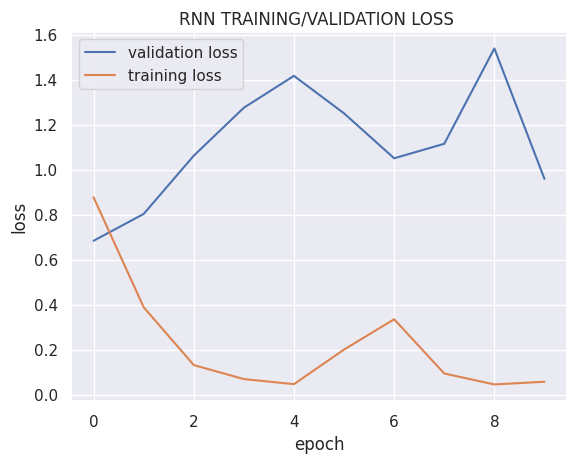

In [55]:
plt.title('RNN TRAINING/VALIDATION LOSS ')
sn.lineplot(rnn_history.history['val_loss'], label='validation loss')
sn.lineplot(rnn_history.history['loss'], label='training loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

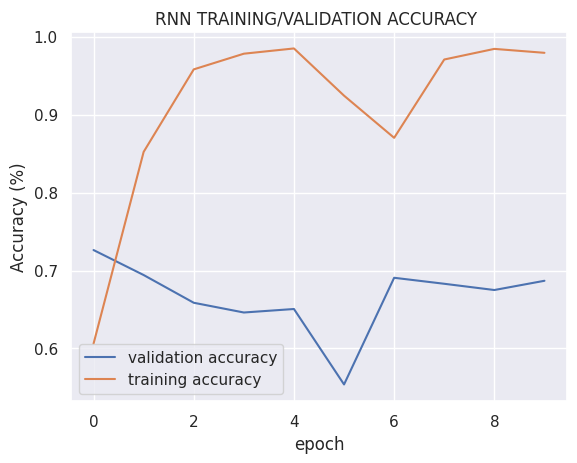

In [56]:
# accuracy.. 
plt.title('RNN TRAINING/VALIDATION ACCURACY ')
sn.lineplot(rnn_history.history['val_accuracy'], label='validation accuracy')
sn.lineplot(rnn_history.history['accuracy'], label='training accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

In [57]:
pd.DataFrame(rnn_history.history).to_csv('rnn_history.csv', index=False)

In [58]:
# performance evaluation metrics
rnn_prediction = rnn_model.predict(X_test)
rnn_prediction = [np.argmax(pre) for pre in  rnn_prediction]
print(rnn_prediction[:30])

98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
[1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1]


In [59]:
list(label_mapper.keys())

['negative', 'neutral', 'positive']

              precision    recall  f1-score   support

    negative       0.64      0.66      0.65       682
     neutral       0.71      0.82      0.76      1470
    positive       0.69      0.51      0.59       968

    accuracy                           0.69      3120
   macro avg       0.68      0.66      0.66      3120
weighted avg       0.69      0.69      0.68      3120



<Axes: >

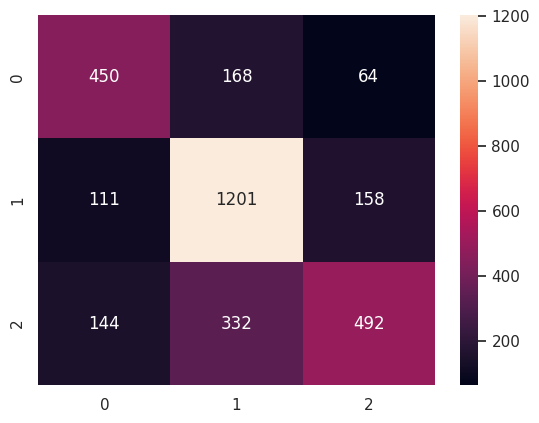

In [60]:
# classification report and confusion matrix 
rnn_class_report =  classification_report(y_test, rnn_prediction, target_names=label_mapper.keys())
rnn_matrix_report =  confusion_matrix(y_test, rnn_prediction)

print(rnn_class_report)
sn.heatmap(rnn_matrix_report, fmt='d', annot=True)

LSTM ARCHITECTURE TRAINING

In [61]:
from tensorflow.keras.layers import Embedding, LSTM, RNN, Flatten, Dense, Bidirectional

In [62]:
# parameter can be adjusted... 
epochs = 10
embed_size = 300

lstm_model = tf.keras.Sequential()
lstm_model.add(Embedding(vocab_size, embed_size, input_shape=(maxlen,), name='embedding'))
lstm_model.add(Bidirectional(LSTM(128, return_sequences=True)))
lstm_model.add(LSTM(63))
lstm_model.add(Flatten())
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(3, activation='sigmoid'))


# compile model 
lstm_model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 80, 300)        │     3,971,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 80, 256)        │       439,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 63)             │        80,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 63)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,493,183 (17.14 MB)

 Trainable params: 4,493,183 (17.14 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.5963 - loss: 0.8743 - val_accuracy: 0.7433 - val_loss: 0.6303
Epoch 2/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8464 - loss: 0.4182 - val_accuracy: 0.7256 - val_loss: 0.6729
Epoch 3/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9145 - loss: 0.2415 - val_accuracy: 0.7276 - val_loss: 0.7891
Epoch 4/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9463 - loss: 0.1671 - val_accuracy: 0.7157 - val_loss: 0.8827
Epoch 5/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9634 - loss: 0.1139 - val_accuracy: 0.7173 - val_loss: 1.0823
Epoch 6/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9758 - loss: 0.0714 - val_accuracy: 0.7237 - val_loss: 1.2376
Epoch 7/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9823 - loss: 0.0504 - val_accuracy: 0.7160 - val_loss: 1.3120
Epoch 8/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9847 - loss: 0.0406 - val_acc

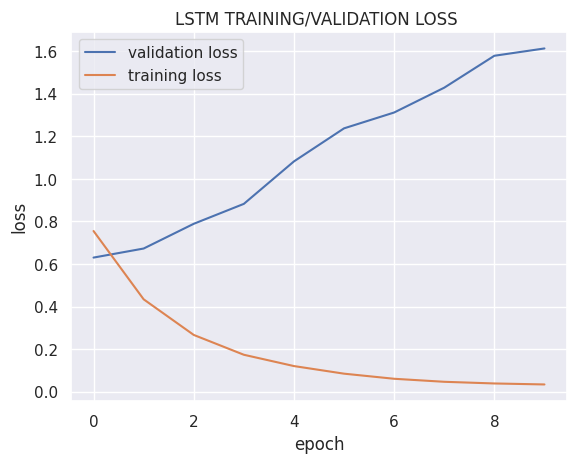

In [64]:
plt.title('LSTM TRAINING/VALIDATION LOSS ')
sn.lineplot(lstm_history.history['val_loss'], label='validation loss')
sn.lineplot(lstm_history.history['loss'], label='training loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

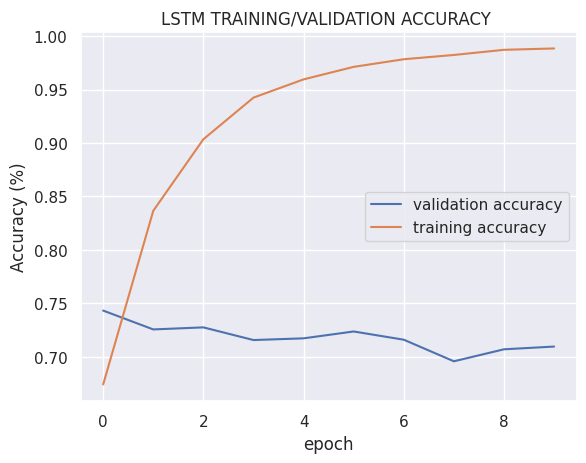

In [65]:
plt.title('LSTM TRAINING/VALIDATION ACCURACY ')
sn.lineplot(lstm_history.history['val_accuracy'], label='validation accuracy')
sn.lineplot(lstm_history.history['accuracy'], label='training accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

In [66]:
pd.DataFrame(lstm_history.history).to_csv('lstm_history.csv', index=False)

98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
[1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 1]
              precision    recall  f1-score   support

    negative       0.67      0.65      0.66       682
     neutral       0.76      0.76      0.76      1470
    positive       0.66      0.67      0.67       968

    accuracy                           0.71      3120
   macro avg       0.70      0.69      0.70      3120
weighted avg       0.71      0.71      0.71      3120



<Axes: >

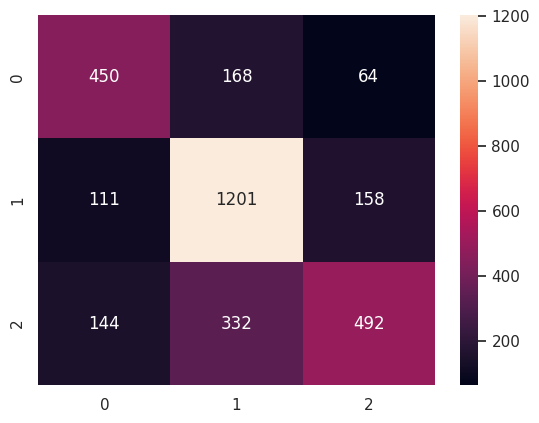

In [67]:
# performance evaluation metrics
lstm_prediction = lstm_model.predict(X_test)
lstm_prediction = [np.argmax(pre) for pre in  lstm_prediction]
print(lstm_prediction[:30])

# classification report and confusion matrix 
lstm_class_report =  classification_report(y_test, lstm_prediction, target_names=label_mapper.keys())
lstm_matrix_report =  confusion_matrix(y_test, rnn_prediction)

print(lstm_class_report)
sn.heatmap(lstm_matrix_report, fmt='d', annot=True)

In [68]:
# print(input_mask)